<a href="https://colab.research.google.com/github/MatheusrCunha/processamento_imagem/blob/main/Projeto_Final(Rodas).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Projeto Final de Processamento Digital de Sinais 2
Nomes: Matheus Rodrigues da Cunha e Bruno

In [ ]:
!pip install opencv-python
!pip install imshowpair

In [ ]:
from skimage import io, exposure, data, img_as_float #imagem em ponto flutuante
from skimage.filters import threshold_local
import imshowpair
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import cv2 as cv

%matplotlib inline

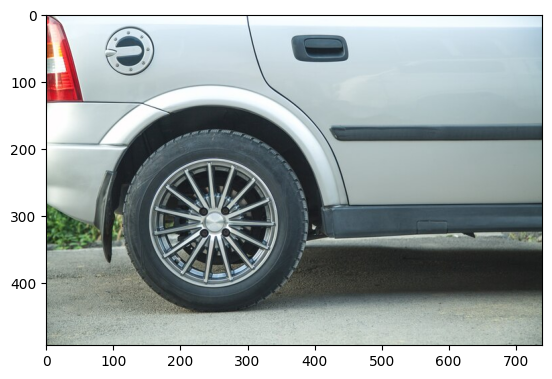

In [ ]:
img = cv.imread('astra.jpg')
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

Histograma

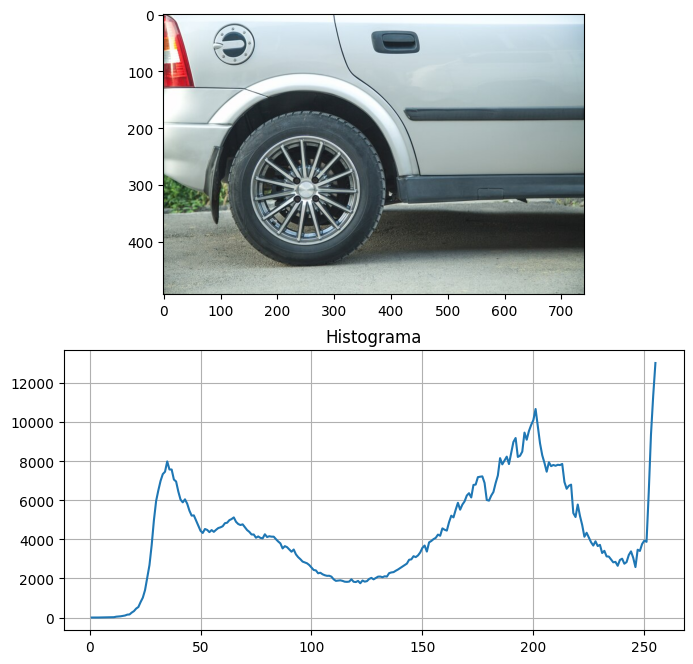

<Figure size 800x800 with 0 Axes>

In [ ]:
coins = io.imread('astra.jpg')
hist_y, hist_x = exposure.histogram(coins)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8))
ax1.imshow(coins, cmap=plt.cm.gray)
ax2.set_title('Histograma')
ax2.plot(hist_x, hist_y)
ax2.grid()
plt.figure(figsize=(8, 8))
plt.show()

Teste de visualização da marcara de cor vermelha

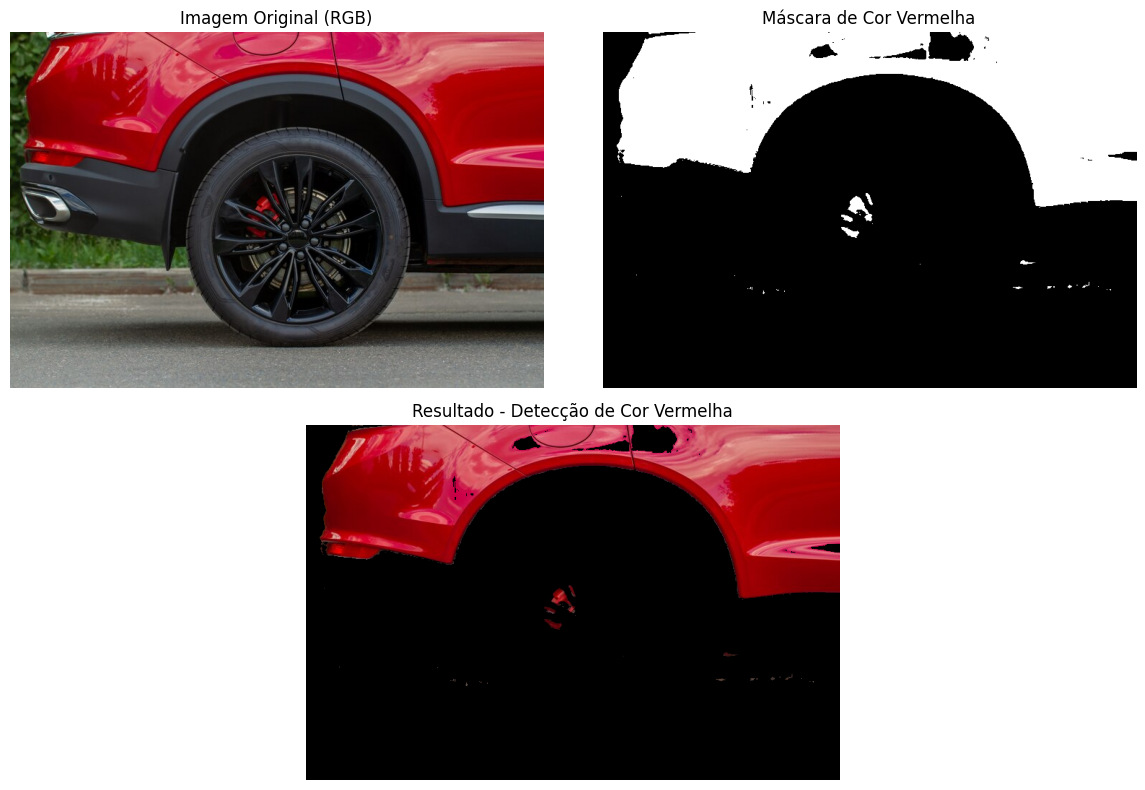

In [ ]:
import cv2

# Carregar a imagem e converter de BGR para RGB
frame = cv2.cvtColor(cv2.imread("astra.jpg"), cv2.COLOR_BGR2RGB)

# Converter de RGB para HSV
hsv = cv2.cvtColor(frame, cv2.COLOR_RGB2HSV)

# Definindo o intervalo para o vermelho
lower_red_1 = np.array([0, 50, 50])
upper_red_1 = np.array([10, 255, 255])

lower_red_2 = np.array([170, 50, 50])
upper_red_2 = np.array([180, 255, 255])

# Thresholding da imagem HSV para obter apenas cores vermelhas
mask1 = cv2.inRange(hsv, lower_red_1, upper_red_1)
mask2 = cv2.inRange(hsv, lower_red_2, upper_red_2)

# Combina as duas máscaras para cobrir toda a faixa do vermelho
mask = mask1 + mask2

# Operação bitwise-AND entre a máscara e a imagem original
res = cv2.bitwise_and(frame, frame, mask=mask)

# Visualização dos resultados
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(frame)
plt.title("Imagem Original (RGB)")
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(mask, cmap='gray')
plt.title("Máscara de Cor Vermelha")
plt.axis('off')

plt.subplot(2, 1, 2)
plt.imshow(res)
plt.title("Resultado - Detecção de Cor Vermelha")
plt.axis('off')

plt.tight_layout()
plt.show()


Como rodas normalmente são pretas, não temos muito tratamento de cores

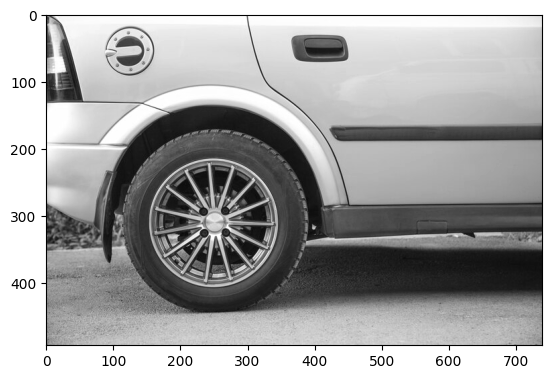

In [ ]:
grey = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
plt.imshow(grey,cmap="gray")
plt.show()

Aplicamos um Blur Gaussiano, que borra a imagem, para eliminar pequenos detalhes e ruídos

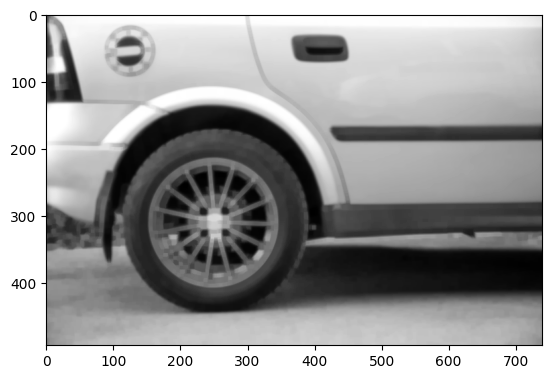

In [ ]:
kernel = np.ones((5,5),np.uint8)
# Blurring and erasing little details
grey = cv.GaussianBlur(grey,(9,9),0)
grey = cv.morphologyEx(grey, cv.MORPH_OPEN, kernel)
grey = cv.morphologyEx(grey, cv.MORPH_CLOSE, kernel)
plt.imshow(grey,cmap="gray")
plt.show()

No pré-processamento iremos apagar tudo que não é preto da imagem

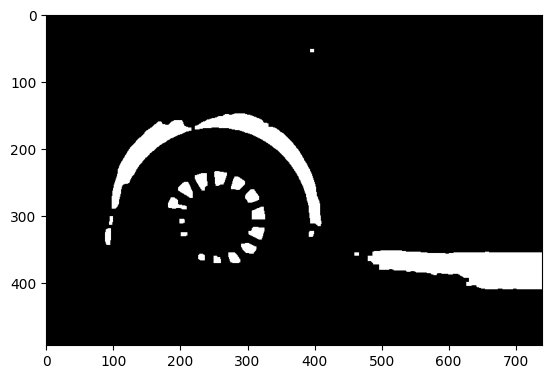

In [ ]:
grey = cv.threshold(grey,40,255,cv.THRESH_BINARY_INV)[1] #acima de 40 seta como 255, abaixo de 40 seta como 0
grey = cv.morphologyEx(grey, cv.MORPH_CLOSE, kernel)
plt.imshow(grey,cmap="gray")
plt.show()

É importante que as rodas não tenham muitos detalhes internos, isso facilita a detecção.

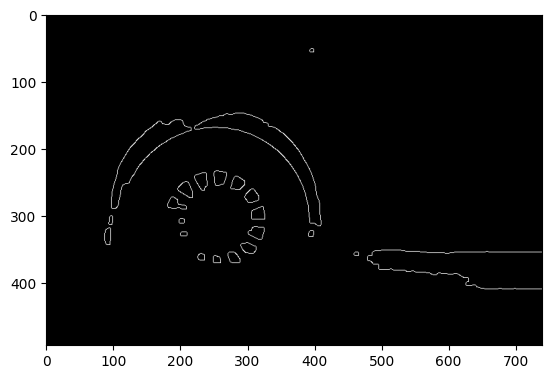

In [ ]:
canny = cv.Canny(grey,100,200)  #detectar bordas, limite inferior e superior
plt.imshow(canny,cmap="gray")
plt.show()

Essa parte do código usa o método cv.HoughCircles da OpenCV para detectar círculos em uma imagem em tons de cinza (grey)

In [ ]:
circles = cv.HoughCircles(grey,
                          cv.HOUGH_GRADIENT,
                          dp=1.1,
                          minDist=300,
                          param1=200,
                          param2=40,
                          minRadius=0,
                          maxRadius=0)
print(circles)

[[[253.55    308.55002 139.37   ]]]


Faz a detecção de círculos em uma imagem, desenhando contornos e marcando o centro dos círculos

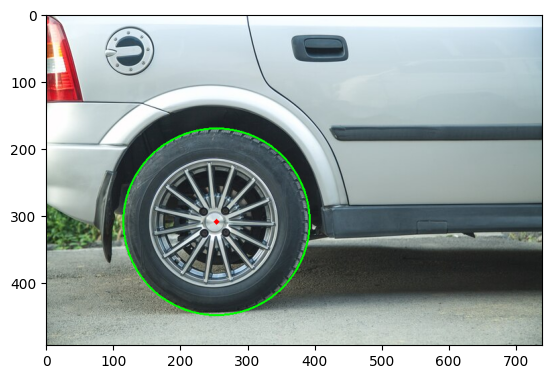

In [ ]:
circles = np.uint16(np.around(circles))
cimg = img.copy()
for i in circles[0,:]:
    cv.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle'
    cv.circle(cimg,(i[0],i[1]),2,(255,0,0),3)

plt.imshow(cimg)

Referências:
https://www.cognex.com/pt-br/industries/automotive/tire-and-wheel-systems/tire-and-wheel-identification